<a href="https://colab.research.google.com/github/beneDesp/GLDM3002/blob/lab1/Lab1_walsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data and Libraries

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cereals.csv to Cereals.csv


In [3]:
import pandas as pd
#/content/Cereals.csv
cereals_df = pd.read_csv('/content/Cereals.csv')

# Quantitative/Numerical

In [4]:
cereals_df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [28]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


## <u> Subquestions </u>

**a)** ***quantitative/numeric varables:*** calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, weight, cups, rating

**b.)**

***nominal variables:*** name, mfr

***ordinal variables:*** type (ordered by temperature), shelf

# Summary Statistics

In [25]:
#type(cereals_df.describe())
cereals_df.describe()
print(cereals_df.describe().loc[['mean','50%','min','max','std']])

        calories   protein       fat      sodium      fiber      carbo  \
mean  106.883117  2.545455  1.012987  159.675325   2.151948  14.802632   
50%   110.000000  3.000000  1.000000  180.000000   2.000000  14.500000   
min    50.000000  1.000000  0.000000    0.000000   0.000000   5.000000   
max   160.000000  6.000000  5.000000  320.000000  14.000000  23.000000   
std    19.484119  1.094790  1.006473   83.832295   2.383364   3.907326   

         sugars      potass    vitamins     shelf    weight      cups  \
mean   7.026316   98.666667   28.246753  2.207792  1.029610  0.821039   
50%    7.000000   90.000000   25.000000  2.000000  1.000000  0.750000   
min    0.000000   15.000000    0.000000  1.000000  0.500000  0.250000   
max   15.000000  330.000000  100.000000  3.000000  1.500000  1.500000   
std    4.378656   70.410636   22.342523  0.832524  0.150477  0.232716   

         rating  
mean  42.665705  
50%   40.400208  
min   18.042851  
max   93.704912  
std   14.047289  


# Plot Histogram

Describe output
           calories       protein           fat        sodium         fiber  \
count  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01   
mean  -8.398765e-17  2.018587e-17  8.583502e-17  5.767392e-18  9.155735e-17   
std    1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00   
min   -2.938605e+00 -1.420902e+00 -1.013072e+00 -1.917189e+00 -9.088244e-01   
25%   -3.555846e-01 -5.014948e-01 -1.013072e+00 -3.563056e-01 -4.864980e-01   
50%    1.610194e-01  4.179123e-01 -1.298811e-02  2.440343e-01 -6.417167e-02   
75%    1.610194e-01  4.179123e-01  9.870962e-01  6.042382e-01  3.581547e-01   
max    2.744040e+00  3.176134e+00  3.987349e+00  1.924986e+00  5.003745e+00   

              carbo        sugars        potass      vitamins        weight  \
count  7.600000e+01  7.600000e+01  7.500000e+01  7.700000e+01  7.700000e+01   
mean   4.236377e-17  2.300791e-17 -5.625130e-17  2.883696e-17 -1.881612e-16   
std    1.006645e+00  1.006645e+00  

array([[<Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'protein'}>,
        <Axes: title={'center': 'fat'}>],
       [<Axes: title={'center': 'sodium'}>,
        <Axes: title={'center': 'fiber'}>,
        <Axes: title={'center': 'carbo'}>],
       [<Axes: title={'center': 'sugars'}>,
        <Axes: title={'center': 'potass'}>,
        <Axes: title={'center': 'vitamins'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'cups'}>,
        <Axes: title={'center': 'rating'}>]], dtype=object)

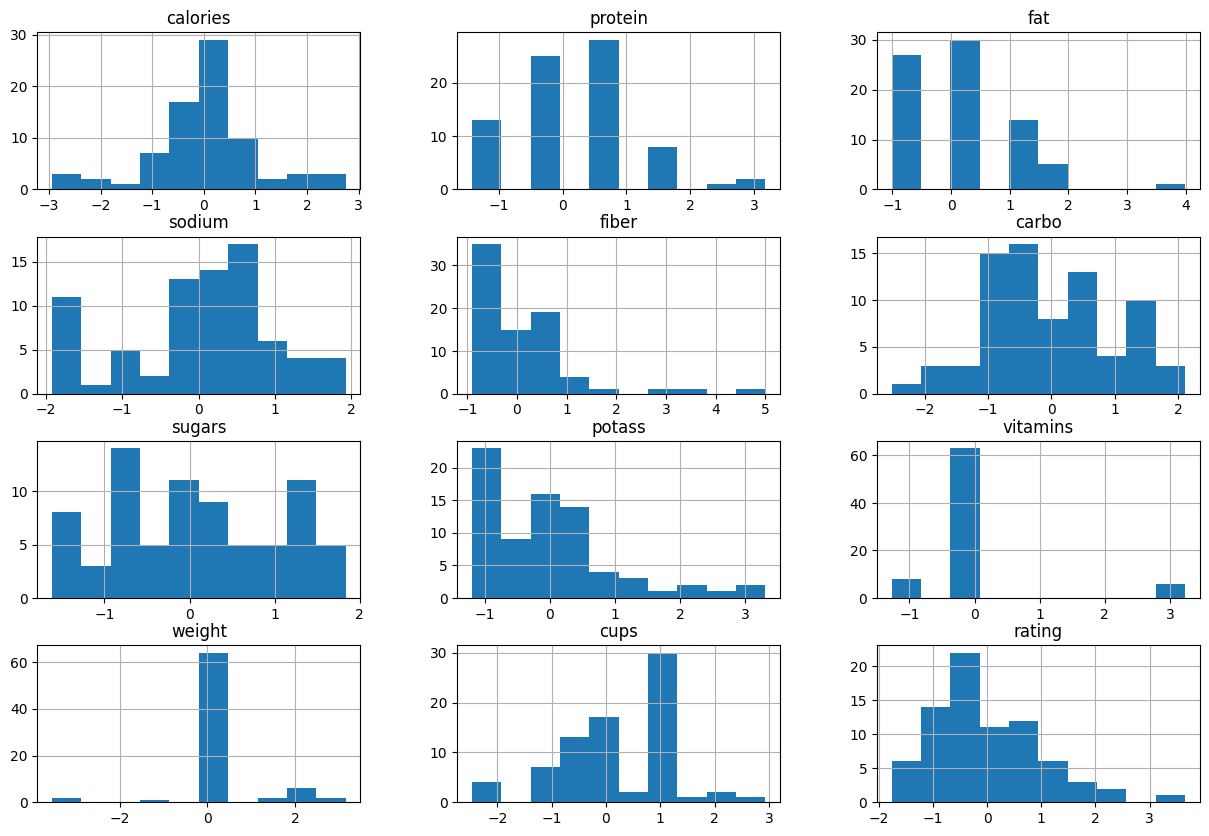

In [26]:
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 'rating']
scaled_cereals_df= pd.DataFrame(sc.fit_transform(cereals_df[cols]), columns=cols)
#print(type(scaled_cereals_df))
#print(type(cereals_df))
print("Describe output")
print(scaled_cereals_df.describe()) #.loc[['mean','50%','min','max','std']])

def find_iqr(x):
  return np.subtract(*np.nanpercentile(x, [75, 25]))
print("IQR output")
print(scaled_cereals_df.apply(find_iqr))
print("Skew output")
print(scaled_cereals_df.skew(axis=0))
scaled_cereals_df.hist(figsize=(15, 10))

## <u> Subquestions </u>

**a)** ***Varables with largest variablilty:*** calories (fat tails, despite strong central tendency), per Interquartile range of scaled variables, fat and sugars are the variables with the largest variablility

**b.)** ***Seemingly-skewed variables:*** fiber, potassium, vitamins

**c.)** ***Seemingly-extreme variables:*** sodium, weight, rating

# Use Boxplot

# Correlation